# Импорты

In [47]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

# Получим тренировочную и тестовую выборку

In [48]:
data_import = pd.read_csv("Google_Stock_Price_Train.csv")

dataset = data_import['Open']

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(np.array(dataset).reshape(-1, 1))

TRAIN_SPLIT=0.8

training_size = int(len(dataset) * TRAIN_SPLIT)
test_size = len(dataset) - training_size
train_dataset, test_dataset = dataset[0:training_size, :], dataset[training_size:, :]

# Создаем временное окно

In [49]:
def create_dataset(data, time_step=1):
    dataX, dataY = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]  # i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(data[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [50]:
time_step = 14
X_train, y_train = create_dataset(train_dataset, time_step)
X_test, y_test = create_dataset(test_dataset, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Инициализируем модель

In [51]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=164, kernel_size=3, strides=1, padding='causal', activation='relu',
                        input_shape=(time_step, 1)),
    #keras.layers.Dropout(0.5), 
    keras.layers.LSTM(50),
    #keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    #keras.layers.GlobalMaxPooling
    keras.layers.Dense(1)
])


model.compile(loss='mean_squared_error', optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001, amsgrad = True), metrics=['mse'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=1)

Epoch 1/50
62/62 [==============================] - 2s 9ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2/50
62/62 [==============================] - 0s 4ms/step - loss: 6.4202e-04 - mse: 6.4202e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3/50
62/62 [==============================] - 0s 4ms/step - loss: 6.1624e-04 - mse: 6.1624e-04 - val_loss: 8.6866e-04 - val_mse: 8.6866e-04
Epoch 4/50
62/62 [==============================] - 0s 4ms/step - loss: 6.0657e-04 - mse: 6.0657e-04 - val_loss: 8.8863e-04 - val_mse: 8.8863e-04
Epoch 5/50
62/62 [==============================] - 0s 4ms/step - loss: 5.8448e-04 - mse: 5.8448e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 6/50
62/62 [==============================] - 0s 4ms/step - loss: 5.4799e-04 - mse: 5.4799e-04 - val_loss: 8.0670e-04 - val_mse: 8.0670e-04
Epoch 7/50
62/62 [==============================] - 0s 4ms/step - loss: 5.4194e-04 - mse: 5.4194e-04 - val_loss: 8.4812e-04 - val_mse: 8.4812e-04
Epoch 8/50

# Получаем предсказания

In [52]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

print(math.sqrt(mean_squared_error(scaler.inverse_transform(y_train.reshape(-1, 1)), train_predict)))

print(math.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), test_predict)))

8.927363883598861
12.659393092673099


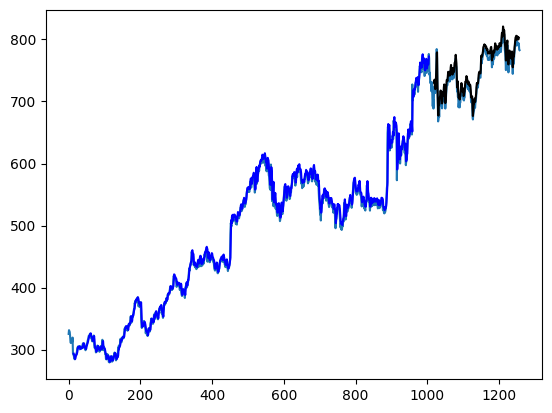

In [53]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(range(time_step, len(train_predict) + time_step), train_predict, c='b')
plt.plot(range(len(train_predict) + 2*time_step, len(train_predict) + len(test_predict) + 2*time_step), test_predict, c='k')
plt.show()